In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображений
img1 = cv2.imread('image5.jpeg')
img2 = cv2.imread('image6.jpeg')


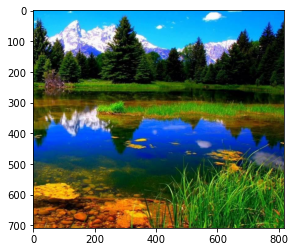

In [2]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

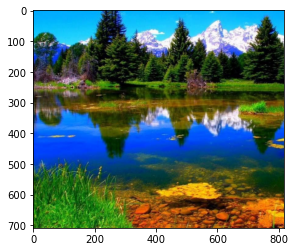

In [3]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
plt.imshow(img2)

# Алгоритм ORB

In [4]:
# Создание детектора и описателя особых точек
orb = cv2.ORB_create()

# Нахождение особых точек и вычисление дескрипторов для первого и второго изображений
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [5]:
# Сопоставление особых точек на двух изображениях
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(des1, des2)

In [6]:
good_matches = []
for m in matches:
    if m.distance < 0.75 * max([n.distance for n in matches]):
        good_matches.append(m)

In [7]:
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

In [8]:
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 4.0)

In [9]:
panorama = cv2.warpPerspective(img1, M, (img1.shape[1] + img2.shape[1], img1.shape[0]))
panorama[0:img2.shape[0], 0:img2.shape[1]] = img2

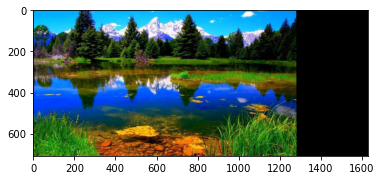

In [10]:
plt.imshow(panorama)

# Алгоритм SIFT

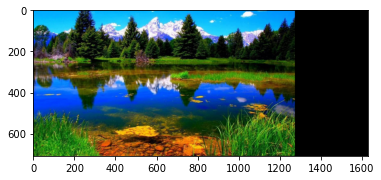

In [11]:
sift = cv2.SIFT_create()

# Получение ключевых точек и дескрипторов для обоих изображений
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Создание объекта Matcher для сопоставления дескрипторов
matcher = cv2.FlannBasedMatcher()

# Сопоставление дескрипторов
matches = matcher.match(des1, des2)

# Сортировка совпадений по расстоянию
matches = sorted(matches, key=lambda x: x.distance)

# Выбор только лучших совпадений
num_good_matches = int(len(matches) * 0.15)
matches = matches[:num_good_matches]

# Извлечение координат ключевых точек для лучших совпадений
pts1 = np.zeros((len(matches), 2), dtype=np.float32)
pts2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    pts1[i, :] = kp1[match.queryIdx].pt
    pts2[i, :] = kp2[match.trainIdx].pt

# Оценка гомографии между двумя изображениями с помощью RANSAC
M, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)

# Создание панорамы
panorama_width = img1.shape[1] + img2.shape[1]
panorama_height = img1.shape[0]

panorama = cv2.warpPerspective(img1, M, (panorama_width, panorama_height))
panorama[0:img2.shape[0], 0:img2.shape[1]] = img2

# Сохранение результата
plt.imshow(panorama)

# Алгоритм BRIEF

In [11]:
pip install opencv-contrib-python --user

  Using cached opencv_contrib_python-4.7.0.72-cp37-abi3-win_amd64.whl (44.9 MB)
Note: you may need to restart the kernel to use updated packages.


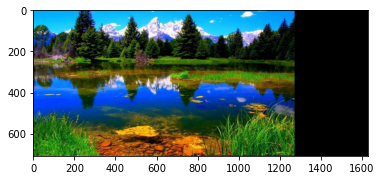

In [24]:
# Создание детектора и описателя BRIEF
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# Инициализция детектора FAST
star = cv2.xfeatures2d.StarDetector_create()

kp1 = star.detect(img1,None)
kp2 = star.detect(img2,None)

# Извлечение дескрипторов для ключевых точек с помощью BRIEF
kp1, des1 = brief.compute(img1, kp1)
kp2, des2 = brief.compute(img2, kp2)
des1 = np.float32(des1)
des2 = np.float32(des2)

# Создание объекта Matcher для сопоставления дескрипторов
matcher = cv2.FlannBasedMatcher()

# Сопоставление дескрипторов
matches = matcher.match(des1, des2)

# Сортировка совпадений по расстоянию
matches = sorted(matches, key=lambda x: x.distance)

# Выбор только лучших совпадений
num_good_matches = int(len(matches) * 0.15)
matches = matches[:num_good_matches]

# Извлечение координат ключевых точек для лучших совпадений
pts1 = np.zeros((len(matches), 2), dtype=np.float32)
pts2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    pts1[i, :] = kp1[match.queryIdx].pt
    pts2[i, :] = kp2[match.trainIdx].pt

# Оценка гомографии между двумя изображениями с помощью RANSAC
M, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)

# Создание панорамы
panorama_width = img1.shape[1] + img2.shape[1]
panorama_height = img1.shape[0]

panorama = cv2.warpPerspective(img1, M, (panorama_width, panorama_height))
panorama[0:img2.shape[0], 0:img2.shape[1]] = img2

# Сохранение результата
plt.imshow(panorama)